<a href="https://colab.research.google.com/github/sweeeet-zoo/sparta5/blob/main/%ED%8C%90%EB%8B%A4%EC%8A%A4_%EA%B3%BC%EC%A0%9C%ED%95%B4%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/data/')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/data'

# 문제1

- **나이가 20살 이상 40살 미만인 승객**
- **pclass가 1등급 혹은 2등급인 승객**
- **열(column)은 survived, pclass, age, fare 만 나오게 출력**
- **10개만 출력**

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

In [ ]:
condition1 = (df['age'] >= 20) & (df['age'] < 40)
condition2 = (df['pclass'] < 3)
df.loc[condition1 & condition2, ['survived', 'pclass', 'age', 'fare']].head(10)

,survived,pclass,age,fare
1,1,1,38.0,71.2833
3,1,1,35.0,53.1000
20,0,2,35.0,26.0000
21,1,2,34.0,13.0000
23,1,1,28.0,35.5000
34,0,1,28.0,82.1708
41,0,2,27.0,21.0000
53,1,2,29.0,26.0000
56,1,2,21.0,10.5000
61,1,1,38.0,80.0000


# 문제2

- **고객 테이블(customers)를 기준으로 주문 테이블(orders)를 합쳐주세요. 주문 금액이 없는 고객도 모두 포함되어야 합니다.**
- **주문 금액이 없는 경우, 0으로 표현하세요.**
- **주문금액이 있는 경우 "구매", 주문금액이 0인 경우 "미구매"로 분류하는 "구매여부" 칼럼을 생성하세요.**
    - df출력 (결과칼럼: 고객번호, 이름, 금액, 구매여부)

In [ ]:
import pandas as pd
import numpy as np

#고객 테이블
customers = pd.DataFrame({

    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],

    '이름': ['승철', '동경', '예나', '혜연', '장훈', '채운', '다연']

})

#주문 테이블
orders = pd.DataFrame({

    'cno': [1001, 1001, 1005, 1006, 1008, 1001],

    '금액': [10000, 20000, 15000, 5000, 100000, 30000]

})

In [ ]:
# 방법1
orders.rename(columns = {'cno':'고객번호'}, inplace = True)
df = pd.merge(customers, orders, on = "고객번호", how = "left")

In [ ]:
# 방법2
# df = pd.merge(customers, orders, left_on = "고객번호", right_on = "cno", how = "left")
# df.drop(columns = "cno", inplace = True)


In [ ]:
df['금액'] = df['금액'].fillna(0).astype(int)
df["구매여부"] = "구매"
df.loc[df["금액"]==0, "구매여부"] = "미구매"
#df["구매여부"] = np.where(df["금액"] > 0, "구매", "미구매")
df

,고객번호,이름,금액,구매여부
0,1001,승철,10000,구매
1,1001,승철,20000,구매
2,1001,승철,30000,구매
3,1002,동경,0,미구매
4,1003,예나,0,미구매
5,1004,혜연,0,미구매
6,1005,장훈,15000,구매
7,1006,채운,5000,구매
8,1007,다연,0,미구매


# 문제3

- **3-1) species별 sepal length, sepal width, petal length, petal width의 평균과 표준편차를 구하세요.**
- **3-2) sepal length, sepal_width, petal_length, petal_length 4가지 변수 중 가장 상관관계가 높은 두 변수를 찾으세요.**
- **3-3) 위에서 구한 두 변수를 x,y축으로 두고 species에 따라 분류하는 산점도를 생성하세요.**

[피어슨 상관계수]
피어슨 상관계수는 두 변수 간의 선형 상관관계를 계량화 한 수치입니다. 코시-슈바르츠 부등식에 의해 +1과 -1사이의 값을 가집니다.
+1의 경우 완벽한 양의 선형 상관 관계, -1의 경우 완벽한 음의 상관관계, 0의 경우 선형 상관관계를 갖지 않습니다.

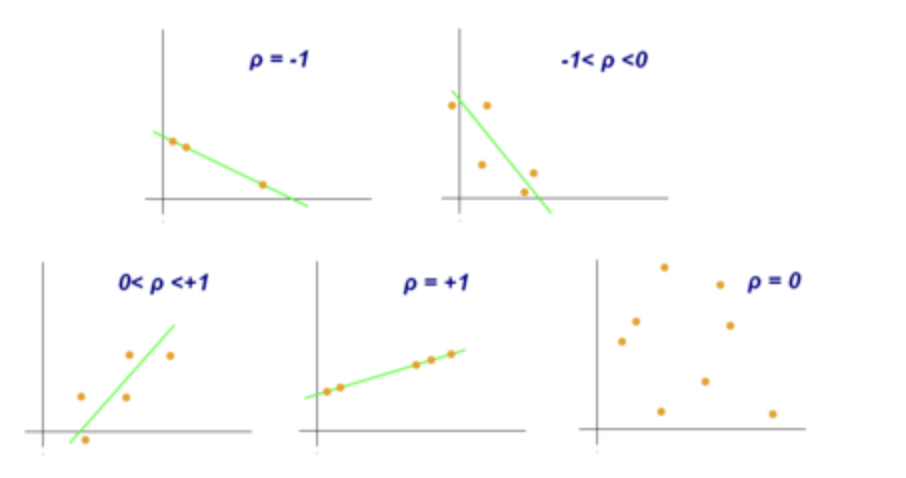


서로 다른 상관계수 값을 갖는 산포도 다이어그램의 예


[켄달-타우상관계수]
켄달-타우 상관계수는 두 변수들간의 순위를 비교해서 연관성을 계산하는 방식입니다.
예를들어 어린이의 나이와 키에 대한 아래와 같은 순위 데이터를 보면, 나이순위에 따라 키의 순위가 동일한 것을 알 수 있습니다.

|순위|	|A |	B	|C	|D	|E|
|나이|	|1	|3	|4	|2	|5|
|키|	|1	|3	|4	|2	|5|
이런 경우 켄달-타우 상관계수의 경우 완벽한 양의 상관 계수인 +1이 됩니다.

[스피어먼 상관계수]
스피어먼 상관계수는 두 변수의 순위 값 사이의 피어슨 상관 계수와 같습니다.
즉, 순서척도가 적용되는 경우에는 스피어먼 상관계수가, 간격척도가 적용되는 경우에는 피어슨 상관계수가 적용됩니다.

※출처 : https://wikidocs.net/157461

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

iris= sns.load_dataset("iris")

In [ ]:
# 3-1)
# 방법1
iris.groupby("species").agg(['mean', 'std'])


sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

In [ ]:
# 방법2
iris.pivot_table(values = ['sepal_length', 'sepal_width',
													'petal_length', 'petal_width'],
                    index = 'species', aggfunc = ['mean', 'std'])


mean                                               std  \
           petal_length petal_width sepal_length sepal_width petal_length   
species                                                                     
setosa            1.462       0.246        5.006       3.428     0.173664   
versicolor        4.260       1.326        5.936       2.770     0.469911   
virginica         5.552       2.026        6.588       2.974     0.551895   

                                                 
           petal_width sepal_length sepal_width  
species                                          
setosa        0.105386     0.352490    0.379064  
versicolor    0.197753     0.516171    0.313798  
virginica     0.274650     0.635880    0.322497

In [ ]:
# 3-2)
iris[['sepal_length', 'sepal_width','petal_length','petal_width']].corr()
# petal_length, petal_width

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: xlabel='petal_length', ylabel='petal_width'>

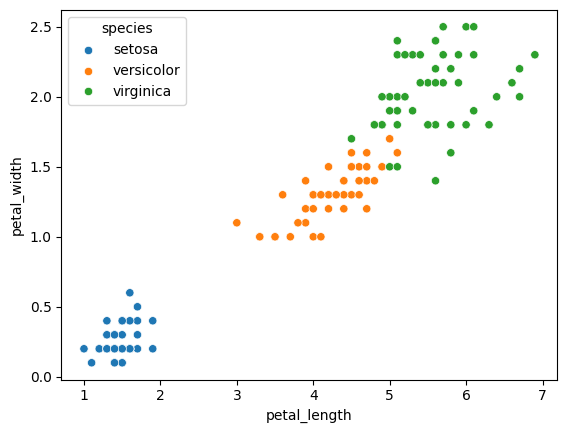

In [ ]:
# 3-3)
sns.scatterplot(x = "petal_length", y = "petal_width",
								data = iris, hue = "species")

# 문제3

- **4-1) FinanceDataReader 라이브러리를 활용하여 2019-01-01부터 2024-12-16까지의 삼성전자(종목코드: 005930)의 주가정보를 불러온 후, 월평균 종가를 구하세요.**
    - Close 칼럼 이용
    - "samsung_mean" 새로운 데이터 프레임에 저장
- **4-2) 평균 종가(Close)의 전월대비 증감율을 구하세요.**
    - samsung_mean 데이터프레임에 "전월대비(%)" 컬럼 생성
    - 소수점 첫째자리 반올림
- **4-3) 평균 종가(Close)의 전년동월대비 증감율을 구하세요.**
    - samsung_mean 데이터 프레임에 "전년동월대비(%)" 컬럼 생성
    - 소수점 첫째자리 반올림
- **3단계 까지 완성후, samsung_mean을 출력하세요.**

In [ ]:
!pip install -U finance-datareader
import FinanceDataReader as fdr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
# 4-1)
samsung = fdr.DataReader('005930', "2019-01-01", "2024-12-16")
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2024-12-10,54500,54500,53700,54000,20783970,0.011236
2024-12-11,53600,54200,53400,54000,14565947,0.000000
2024-12-12,54000,56500,53900,55900,33476698,0.035185


In [ ]:
samsung.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06',
               '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-16'],
              dtype='datetime64[ns]', name='Date', length=1468, freq=None)

In [ ]:
samsung2['Date'].dt.strftime("%Y-%m")

,Date
0,2019-01
1,2019-01
2,2019-01
3,2019-01
4,2019-01
...,...
1463,2024-12
1464,2024-12
1465,2024-12
1466,2024-12


In [ ]:
samsung.index.strftime("%Y-%m")

Index(['2019-01', '2019-01', '2019-01', '2019-01', '2019-01', '2019-01',
       '2019-01', '2019-01', '2019-01', '2019-01',
       ...
       '2024-12', '2024-12', '2024-12', '2024-12', '2024-12', '2024-12',
       '2024-12', '2024-12', '2024-12', '2024-12'],
      dtype='object', name='Date', length=1468)

In [ ]:
samsung2 = samsung.reset_index()
samsung2['Year'] = samsung2['Date'].dt.year
samsung2['Month'] = samsung2['Date'].dt.month
samsung2

,Date,Open,High,Low,Close,Volume,Change,Year,Month
0,2019-01-02,39400,39400,38550,38750,7847664,0.001292,2019,1
1,2019-01-03,38300,38550,37450,37600,12471493,-0.029677,2019,1
2,2019-01-04,37450,37600,36850,37450,14108958,-0.003989,2019,1
3,2019-01-07,38000,38900,37800,38750,12748997,0.034713,2019,1
4,2019-01-08,38000,39200,37950,38100,12756554,-0.016774,2019,1
...,...,...,...,...,...,...,...,...,...
1463,2024-12-10,54500,54500,53700,54000,20783970,0.011236,2024,12
1464,2024-12-11,53600,54200,53400,54000,14565947,0.000000,2024,12
1465,2024-12-12,54000,56500,53900,55900,33476698,0.035185,2024,12
1466,2024-12-13,55800,56300,55500,56100,15908823,0.003578,2024,12


In [ ]:
samsung_mean = samsung2.groupby(["Year","Month"])["Close"].mean()
samsung_mean = pd.DataFrame(samsung_mean)
samsung_mean

Close
Year Month              
2019 1      41600.000000
     2      46308.823529
     3      44560.000000
     4      46061.363636
     5      43023.809524
...                  ...
2024 8      76500.000000
     9      66033.333333
     10     59295.000000
     11     55776.190476
     12     54281.818182

[72 rows x 1 columns]

In [ ]:
# 4-2)
samsung_mean['전월'] = samsung_mean['Close'].shift()
samsung_mean["전월대비(%)"] = \
round((samsung_mean["Close"] - samsung_mean["전월"]) / samsung_mean["전월"] * 100, 1)
samsung_mean

Close            전월  전월대비(%)
Year Month                                     
2019 1      41600.000000           NaN      NaN
     2      46308.823529  41600.000000     11.3
     3      44560.000000  46308.823529     -3.8
     4      46061.363636  44560.000000      3.4
     5      43023.809524  46061.363636     -6.6
...                  ...           ...      ...
2024 8      76500.000000  84382.608696     -9.3
     9      66033.333333  76500.000000    -13.7
     10     59295.000000  66033.333333    -10.2
     11     55776.190476  59295.000000     -5.9
     12     54281.818182  55776.190476     -2.7

[72 rows x 3 columns]

In [ ]:
# 4-3)
samsung_mean["전년동월"] = samsung_mean['Close'].shift(periods = 12)
samsung_mean["전년동월대비(%)"] = \
round((samsung_mean["Close"] - samsung_mean["전년동월"]) / samsung_mean["전년동월"] * 100, 1)
samsung_mean

Close            전월  전월대비(%)          전년동월  전년동월대비(%)
Year Month                                                              
2019 1      41600.000000           NaN      NaN           NaN        NaN
     2      46308.823529  41600.000000     11.3           NaN        NaN
     3      44560.000000  46308.823529     -3.8           NaN        NaN
     4      46061.363636  44560.000000      3.4           NaN        NaN
     5      43023.809524  46061.363636     -6.6           NaN        NaN
...                  ...           ...      ...           ...        ...
2024 8      76500.000000  84382.608696     -9.3  67686.363636       13.0
     9      66033.333333  76500.000000    -13.7  70168.421053       -5.9
     10     59295.000000  66033.333333    -10.2  67910.526316      -12.7
     11     55776.190476  59295.000000     -5.9  71409.090909      -21.9
     12     54281.818182  55776.190476     -2.7  73810.526316      -26.5

[72 rows x 5 columns]

# 문제5

- **1) 전체 데이터 결측값 처리 (삭제)**
- **2) Quantity, UnitPrice 0 이하 제거**
- **3)상품코드가 일반적이지 않은 경우**
    - StockCode 중 다음과 같이 문자로만 구성된 경우는 일반적이지 않은 경우로 보고, **숫자를 한개이상 포함하지 않는 경우**는 이상치로 정의, 데이터셋에서 제거하세요.
- **4) Quantity, UnitPrice 컬럼 IQR 기반 방법으로 이상치 제거**
    - IQR (Inter Quantitle Range) = Q3 (3사분위 수) - Q1 (1사분위수)
    - Quantity 컬럼과 UnitPrice컬럼에서, lower_bound (Q1 - 1.5 * IQR) 보다 작거나 upper_bound( Q3 + 1.5 * IQR) 보다 큰 경우를 이상치로 정의하고 제거하세요.
- **4단계까지 완성 후, df.shape를 출력하세요.**

In [ ]:
import pandas as pd

df = pd.read_csv('online_retail.csv', encoding="ISO-8859-1")

In [ ]:
df.shape

(541909, 8)

In [ ]:
# 5-1) 결측값 제거
df = df.dropna()
df.shape

(406829, 8)

In [ ]:
# 5-2) 상품수량이 음수인 경우를 제거
df = df[df['Quantity']>0]
df.shape

(397924, 8)

In [ ]:
# 5-2) 상품 가격이 0 이하인 경우를 제거
df = df[df['UnitPrice']>0]
df.shape

(397884, 8)

In [ ]:
# 5-3) 상품 코드가 일반적이지 않은 경우를 탐색
df['ContainDigit'] = df['StockCode'].apply(lambda x: any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].shape[0])
df[df['ContainDigit'] == False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France,False
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands,False
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany,False
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom,False
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274.0,United Kingdom,False


In [ ]:
# 5-3) 상품 코드가 일반적이지 않은 경우를 제거
df = df[df['ContainDigit'] == True]
df.shape

(396470, 9)

In [ ]:
# 5-4) IQR 기반 이상치 제거

# 방법1
q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df["Quantity"] > lower_bound) & (df["Quantity"] < upper_bound) ]
df.shape

(370803, 9)

In [ ]:
q1 = df["UnitPrice"].quantile(0.25)
q3 = df["UnitPrice"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df["UnitPrice"] > lower_bound) & (df["UnitPrice"] < upper_bound) ]
df.shape

(337338, 9)

In [ ]:
# 방법2
def drop_outliers_iqr(df, column):


  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  df_drop_outlier = df[(df[column] > lower_bound) & (df[column] < upper_bound)]

  return df_drop_outlier


# Quantity IQR 기반 이상치 제거
# df = drop_outliers_iqr(df, 'Quantity')
# print(df.shape)

# UnitPrice IQR 기반 이상치 제거
# df = drop_outliers_iqr(df, "UnitPrice")
# print(df.shape)

In [ ]:
# 방법3

import numpy as np
def calulate_iqr(data):
    data = np.array(data) # Pandas quantile 사용 시, 해당 라인 주석 처리
    q1 = np.percentile(data, 25) # q1 = data.quantile(0.25)
    q2 =np.percentile(data, 50) # q2 = data.quantile(0.5)
    q3 = np.percentile(data, 75) # q3 = data.quantile(0.75)

    iqr = q3 - q1

    upper_bound = q3 + 1.5* iqr
    lower_bound = q1 - 1.5* iqr

    outlier = []
    for i in data:
        if i >= upper_bound:
            outlier.append(i)
        elif i <= lower_bound:
            outlier.append(i)
        else:
            pass
    return outlier # q1,q2,q3, lower_bound,upper_bound, outlier

In [ ]:
# Quantity IQR 기반 이상치 제거
df = df[~df["Quantity"].isin(calulate_iqr(df["Quantity"]))]
print(df.shape)

# UnitPrice IQR 기반 이상치 제거
df = df[~df["UnitPrice"].isin(calulate_iqr(df["UnitPrice"]))]
print(df.shape)

(370803, 9)
(337338, 9)


# 문제6

- 위의 문제를 해결하기 위한 파이썬 코드를 작성하여, 같은 결과를 도출하세요.
    - 1단계) 날짜 "%Y-%m" 형태로 변형
    - 2단계) 월별 주문 건수 계산 및 누락 월 확인
    - 3단계) 기간에 포함된 전체 월 인덱스로 생성
    - 4단계) 전체 월 인덱스로 교체 후, 결측값 0 처리
    - 5단계) 데이터 프레임 변환 후, 전월 주문건수 계산
    - 6단계) 증감율 계산
    
    df 출력 (컬럼: cnt_orders, growth_rate)

In [ ]:
import pandas as pd

orders = pd.read_csv("orders.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'orders.csv'

In [ ]:
# 1) order_purchase_timestamp "%Y-%m" 형태로 바꾸기
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["month"] = orders["order_purchase_timestamp"].dt.strftime("%Y-%m")


In [ ]:
# 2) 월별 주문 건수 count
df = orders.groupby("month")["order_id"].count()
df

,order_id
month,
2016-10,3
2017-01,12
2017-02,16
2017-03,28
2017-04,33
2017-05,40
2017-06,28
2017-07,41
2017-08,41


In [ ]:
# 3) 누락월 생성
date_index = pd.date_range(df.index.min(), df.index.max(), freq = 'MS').strftime("%Y-%m")
date_index

Index(['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'],
      dtype='object')

In [ ]:
# 4) 전체 월 인덱스로 교체 후, 결측값 0 처리
df = df.reindex(date_index, fill_value = 0)
df

,order_id
2016-10,3
2016-11,0
2016-12,0
2017-01,12
2017-02,16
2017-03,28
2017-04,33
2017-05,40
2017-06,28
2017-07,41


In [ ]:
# 5) 데이터 프레임으로 변환 후, 전월 주문건수 생성
df = pd.DataFrame(df)
df

,order_id
2016-10,3
2016-11,0
2016-12,0
2017-01,12
2017-02,16
2017-03,28
2017-04,33
2017-05,40
2017-06,28
2017-07,41


In [ ]:
df.rename(columns = {"order_id":"cnt_orders"}, inplace = True)
df["prev_orders"] = df["cnt_orders"].shift()
df

,cnt_orders,prev_orders
2016-10,3,NaN
2016-11,0,3.0
2016-12,0,0.0
2017-01,12,0.0
2017-02,16,12.0
2017-03,28,16.0
2017-04,33,28.0
2017-05,40,33.0
2017-06,28,40.0
2017-07,41,28.0


In [ ]:
# 6) 증감율 계산
def calculate_growth_rate(row, prev_col, cur_col):
    if pd.isna(row[prev_col]):  # prev_orders IS NULL
        return None
    elif row[prev_col] == 0:  # prev_orders = 0
        return row[cur_col] * 100
    else:
        return round(((row[cur_col] - row[prev_col]) / row[prev_col]) * 100, 2)

df["growth_rate"] = df.apply(calculate_growth_rate,
														prev_col = 'prev_orders',
														cur_col = 'cnt_orders',
														axis = 1)


In [ ]:
df[['cnt_orders','growth_rate']]

,cnt_orders,growth_rate
2016-10,3,NaN
2016-11,0,-100.00
2016-12,0,0.00
2017-01,12,1200.00
2017-02,16,33.33
2017-03,28,75.00
2017-04,33,17.86
2017-05,40,21.21
2017-06,28,-30.00
2017-07,41,46.43
